7. In the chapter, we mentioned the use of correlation-based distance and Euclidean distance as dissimilarity measures for hierarchical clustering. 
It turns out that these two measures are almost equivalent: if each observation has been centered to have mean zero and standard deviation one, and if we let $r_{ij}$ denote the correlation between the $i$-th and $j$-th observations, then the quantity $1 − r_{ij}$ is proportional to the squared Euclidean distance between the $i$-th and $j$-th observations.

On the `USArrests` data, show that this proportionality holds.

*Hint: The Euclidean distance can be calculated using the `dist()` function, and correlations can be calculated using the `cor()` function.*

In [1]:
head(USArrests)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [2]:
str(USArrests)

'data.frame':	50 obs. of  4 variables:
 $ Murder  : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop: int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape    : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...


In [3]:
colSums(is.na(USArrests))

Murder  Assault UrbanPop     Rape 
       0        0        0        0

We scale the feature space first.

In [4]:
X <- scale(USArrests)

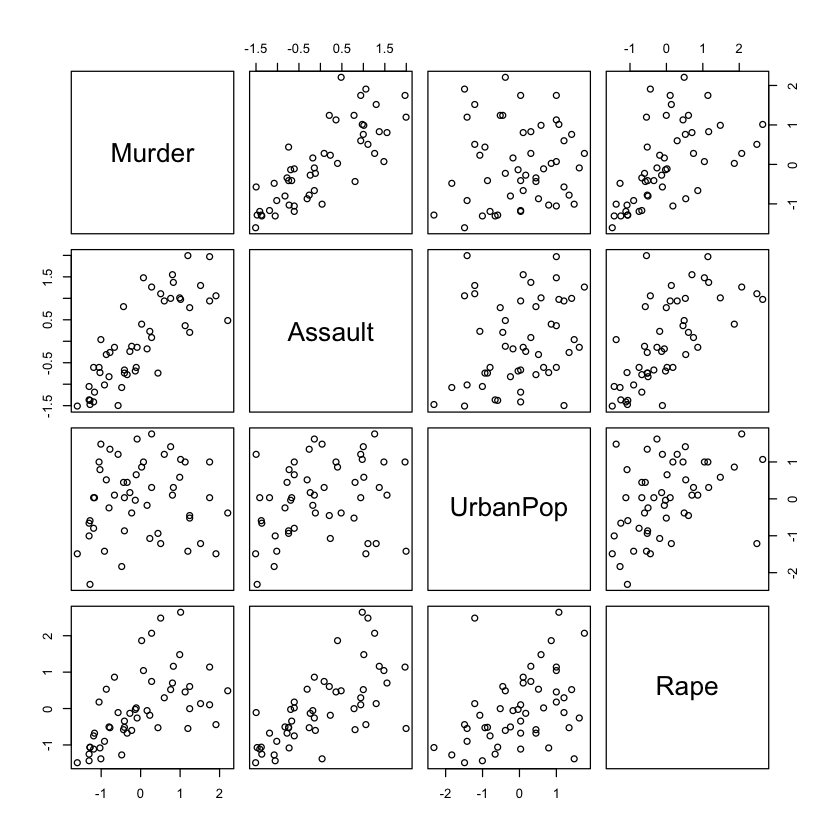

In [5]:
pairs(X)

We calculate the Euclidean distance matrix and the correlation-based distance matrix for the scaled data set.

In [6]:
X_eucl <- dist(X)
X_corr <- as.dist(1 - cor(t(X)))

Now we perform the hierarchical clustering with complete linkage.

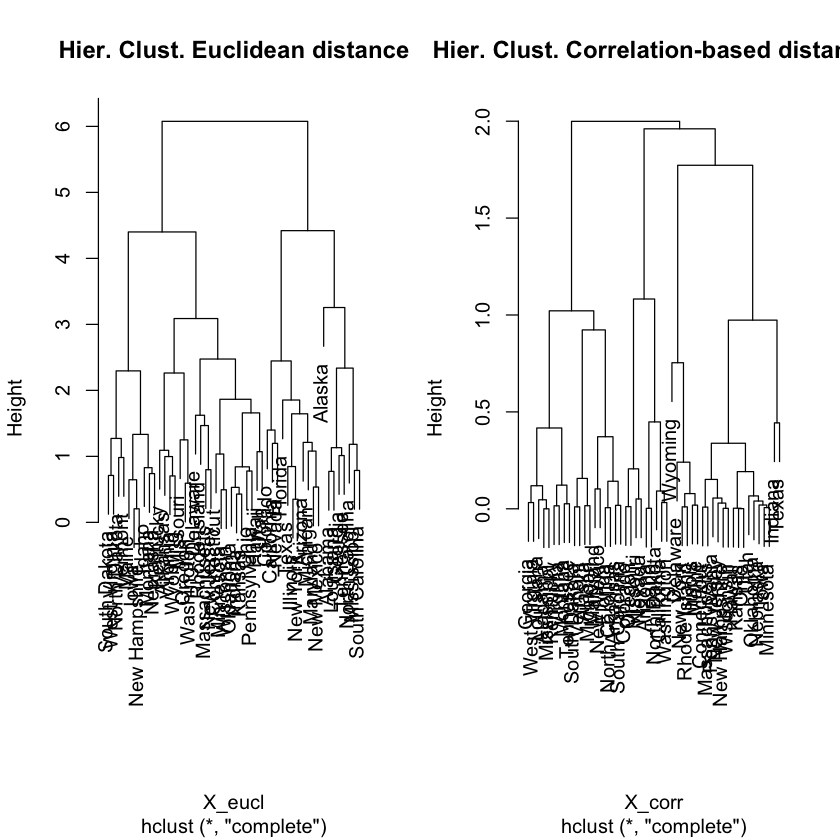

In [7]:
par(mfrow = c(1, 2))
plot(
    hclust(X_eucl, method = "complete"),
    main = "Hier. Clust. Euclidean distance",
)
plot(
    hclust(X_corr, method = "complete"),
    main = "Hier. Clust. Correlation-based distance",
)

Now we take the square root of the $1 - r_{ij}$ term and build the distance. In fact, the squared Euclidean distance, provided the data is normalized: $d^2_{\text{Euclidean}} = 2 n (1 - r_{ij})$, where $n$ is the number of observations.

In [10]:
X_corr_sqr <- as.dist(sqrt(2 * nrow(X) * (1 - cor(t(X)))))

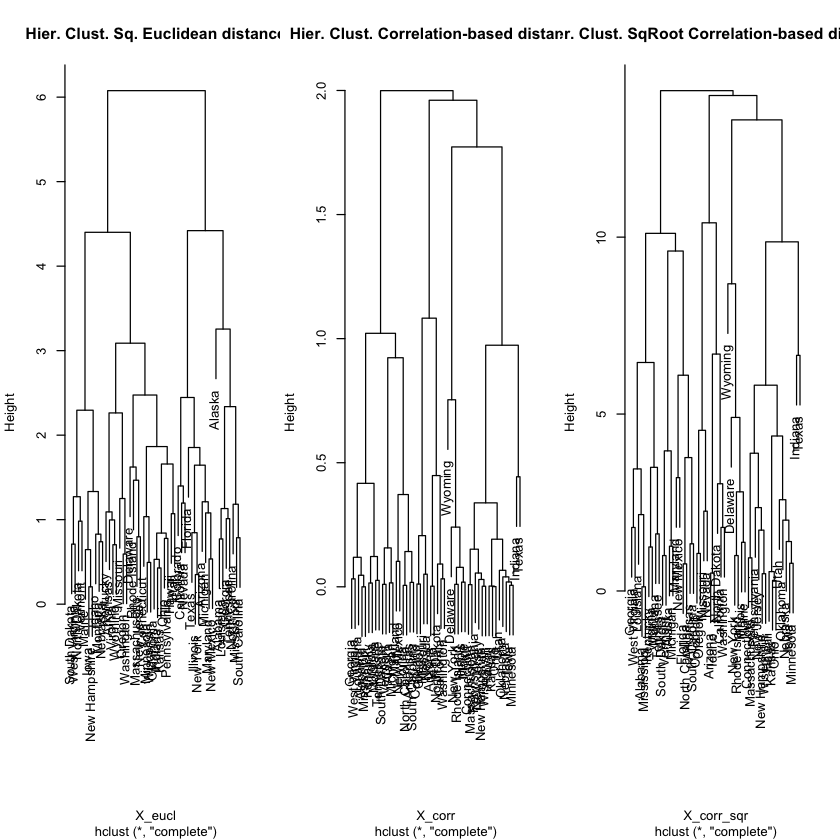

In [11]:
par(mfrow = c(1, 3))
plot(
    hclust(X_eucl, method = "complete"),
    main = "Hier. Clust. Sq. Euclidean distance",
)
plot(
    hclust(X_corr, method = "complete"),
    main = "Hier. Clust. Correlation-based distance",
)
plot(
    hclust(X_corr_sqr, method = "complete"),
    main = "Hier. Clust. SqRoot Correlation-based distance",
)